In [15]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [66]:
end = dt.datetime.now()
start = dt.datetime(end.year - 20,end.month,end.day)

In [87]:
df = reader.get_data_yahoo('GOOG',start,end)

In [88]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
...,...,...,...,...,...,...
2021-11-04,2999.000000,2932.699951,2944.000000,2973.659912,1235000.0,2973.659912
2021-11-05,3011.415039,2973.040039,2987.070068,2984.820068,1019700.0,2984.820068
2021-11-08,3020.689941,2982.399902,3000.000000,2987.030029,919400.0,2987.030029


In [89]:
from fbprophet import Prophet

In [90]:
model = Prophet()

In [91]:
df = df.reset_index()

In [92]:
df[['ds','y']] = df[['Date','Adj Close']]

In [93]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -225.759


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       11029.6     0.0411245       3833.63           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       11182.2    0.00980839       706.454           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       11220.5     0.0354803        766.83           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       11241.3    0.00746507       547.318           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       11251.6    0.00355118       381.788           1           1      585   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     517     

In [94]:
future = model.make_future_dataframe(periods=365)

In [95]:
forecast = model.predict(future)

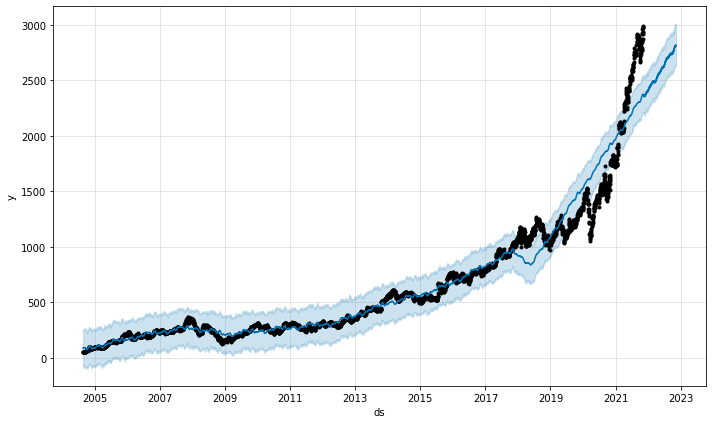

In [96]:
model.plot(forecast)
plt.show()